# Rt Live Model

In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from matplotlib import pyplot as plt
from covid.models.generative import GenerativeModel
from covid.data import summarize_inference_data
%config InlineBackend.figure_format = 'retina'

from covid.data import get_and_process_covidtracking_data_il, get_and_process_covidtracking_data_ilsev, summarize_inference_data

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-iowvu44u because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Fetch data and select the state's data

In [2]:
df = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today())#-pd.Timedelta(days=1))
dfunn = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today(), norm=False)#-pd.Timedelta(days=1))
dfsev = get_and_process_covidtracking_data_ilsev(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))

In [3]:
region = "Israel"
model_data = df.loc[region]
model_sev = dfsev.loc[region]
model_unn = dfunn.loc[region]

## Create the model instance and sample

In [4]:
gmsev = GenerativeModel(region, model_sev, buffer_days = 20, delay=5+5)
gmsev.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 6021 seconds.


In [5]:
gm = GenerativeModel(region, model_data, delay=5)
gm.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 5715 seconds.


In [6]:
gmunn = GenerativeModel(region, model_unn, delay=2)
gmunn.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 6197 seconds.


## Summarize Model Output

In [7]:
result = summarize_inference_data(gm.inference_data)
resultsev = summarize_inference_data(gmsev.inference_data)
resultunn = summarize_inference_data(gmunn.inference_data)

In [8]:
result.tail(60)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-08-23,1.120367,1.118954,1.028135,1.186423,2180.440241,1892.111192,2019.360024,965,12607
2020-08-24,1.120540,1.120031,1.039122,1.189361,2228.618341,1907.159652,1740.380577,1900,28801
2020-08-25,1.124780,1.119976,1.051896,1.206281,2278.624506,1925.418614,1571.614687,1955,32817
2020-08-26,1.124426,1.121787,1.041964,1.201925,2330.189470,1946.865845,1557.901438,1953,33072
2020-08-27,1.123600,1.122635,1.036195,1.193052,2383.845456,1971.439921,1552.333336,2071,35196
2020-08-28,1.125282,1.122594,1.048003,1.197115,2439.422815,1999.053921,2160.786532,1831,22355
2020-08-29,1.125457,1.124399,1.044985,1.194322,2496.099813,2029.594169,2360.347423,910,10171
2020-08-30,1.126038,1.124617,1.035270,1.185905,2554.194082,2062.932672,2253.442887,1103,12913
2020-08-31,1.124710,1.124571,1.043447,1.195754,2614.022022,2098.938677,1874.489812,2178,30653


In [9]:
resultunn.tail(60)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-08-23,1.291574,1.286648,1.197965,1.390046,2189.475557,1682.238558,965.0,965,100000
2020-08-24,1.299963,1.296050,1.198325,1.394488,2299.754456,1728.934529,1900.0,1900,100000
2020-08-25,1.303652,1.301146,1.203024,1.397328,2419.516824,1782.068950,1955.0,1955,100000
2020-08-26,1.305108,1.304576,1.205118,1.397002,2549.209957,1842.035196,1953.0,1953,100000
2020-08-27,1.306203,1.300194,1.211568,1.403982,2688.230192,1909.198164,2071.0,2071,100000
2020-08-28,1.307643,1.306646,1.206278,1.413804,2835.745676,1983.918758,1831.0,1831,100000
2020-08-29,1.303742,1.302025,1.203072,1.405383,2991.766858,2066.565159,910.0,910,100000
2020-08-30,1.300823,1.298196,1.194367,1.391382,3156.827796,2157.446529,1103.0,1103,100000
2020-08-31,1.292638,1.289753,1.195750,1.397233,3330.203006,2256.757389,2178.0,2178,100000


In [10]:
resultsev.tail(30)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-09-21,0.840636,0.840205,0.758150,0.898715,85.629329,93.236343,115.0,115.0,10000
2020-09-22,0.829314,0.828972,0.757216,0.898029,83.103428,95.405356,98.0,98.0,10000
2020-09-23,0.820881,0.821068,0.746984,0.893379,80.474636,97.376269,97.0,97.0,10000
2020-09-24,0.814153,0.814403,0.728426,0.893781,77.750173,99.115609,98.0,98.0,10000
2020-09-25,0.807647,0.806127,0.705052,0.875375,74.959098,100.593339,121.0,121.0,10000
2020-09-26,0.803716,0.801862,0.706635,0.884211,72.149324,101.783363,93.0,93.0,10000
2020-09-27,0.799570,0.795789,0.691692,0.878173,69.350246,102.663585,124.0,124.0,10000
2020-09-28,0.798491,0.794536,0.697010,0.885637,66.589794,103.218366,93.0,93.0,10000
2020-09-29,0.796494,0.796870,0.677938,0.872752,63.890697,103.438398,133.0,133.0,10000


## Plot Model Output

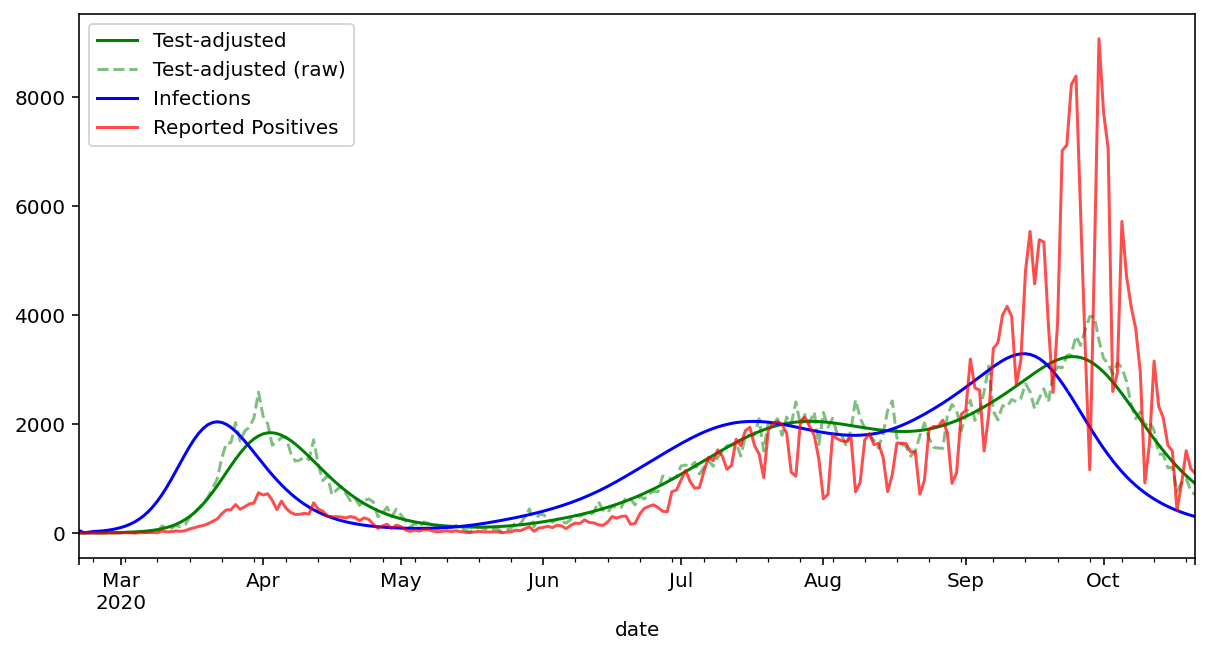

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
result.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result.infections.plot(c="b", label="Infections")
gm.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

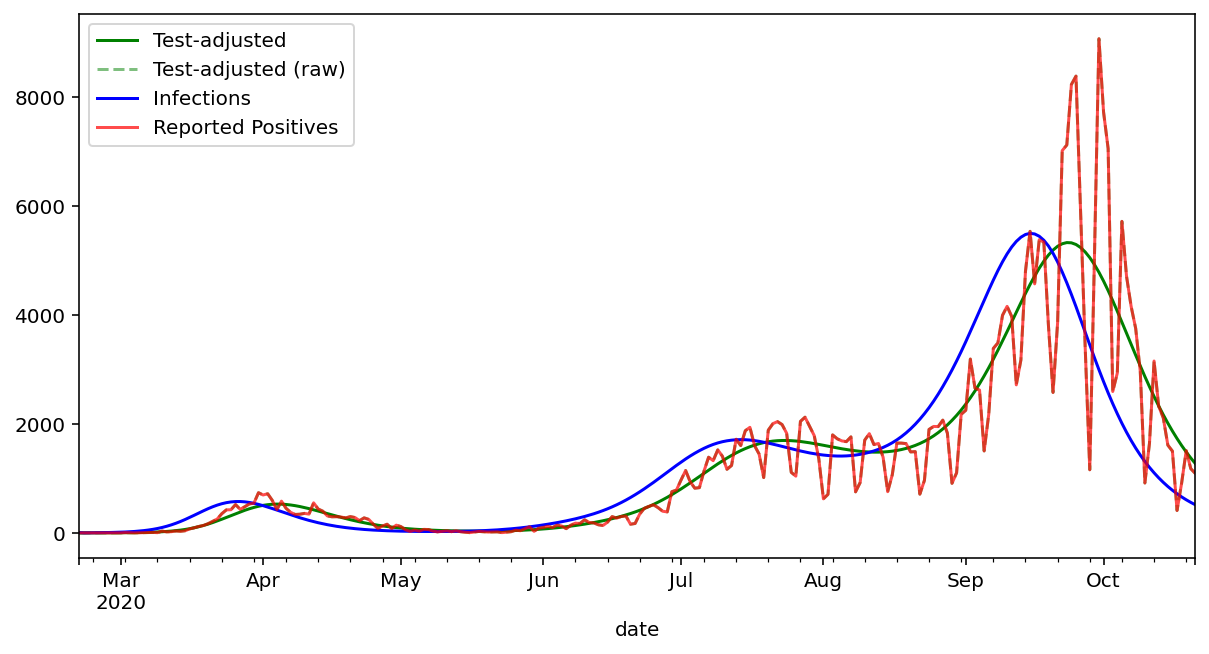

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
resultunn.test_adjusted_positive.plot(c="g", label="Test-adjusted")
resultunn.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
resultunn.infections.plot(c="b", label="Infections")
gmunn.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

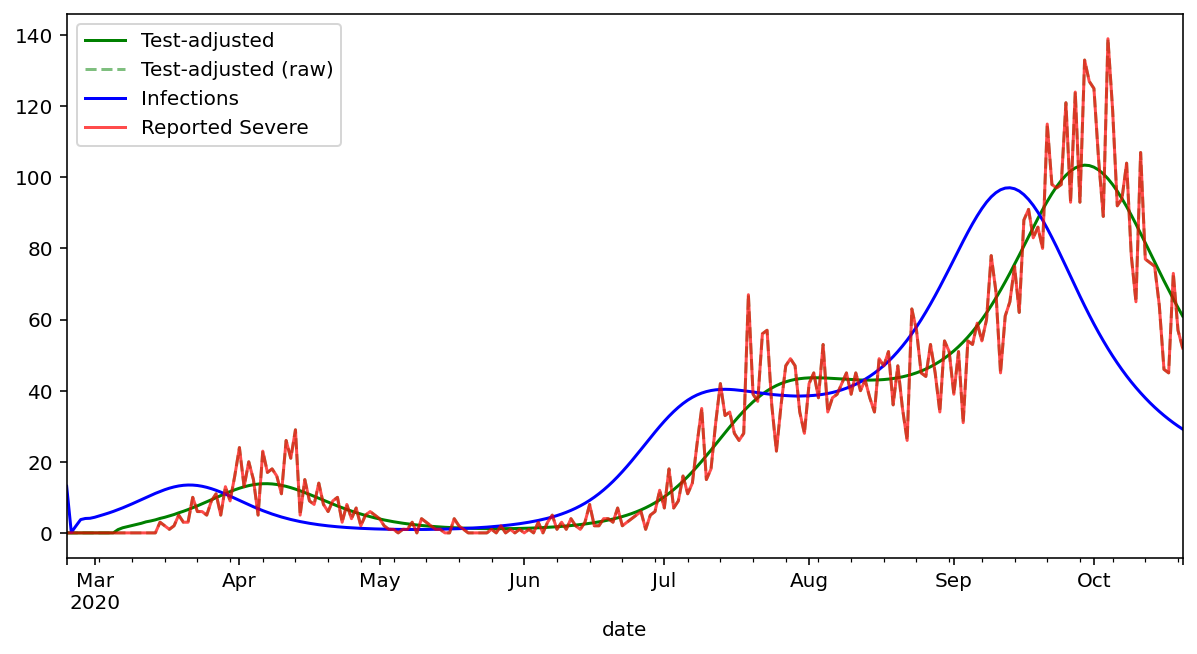

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
resultsev.test_adjusted_positive.plot(c="g", label="Test-adjusted")
resultsev.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
resultsev.infections.plot(c="b", label="Infections")
gmsev.observed.positive.plot(c='r', alpha=.7, label="Reported Severe")
fig.set_facecolor('w')
ax.legend();

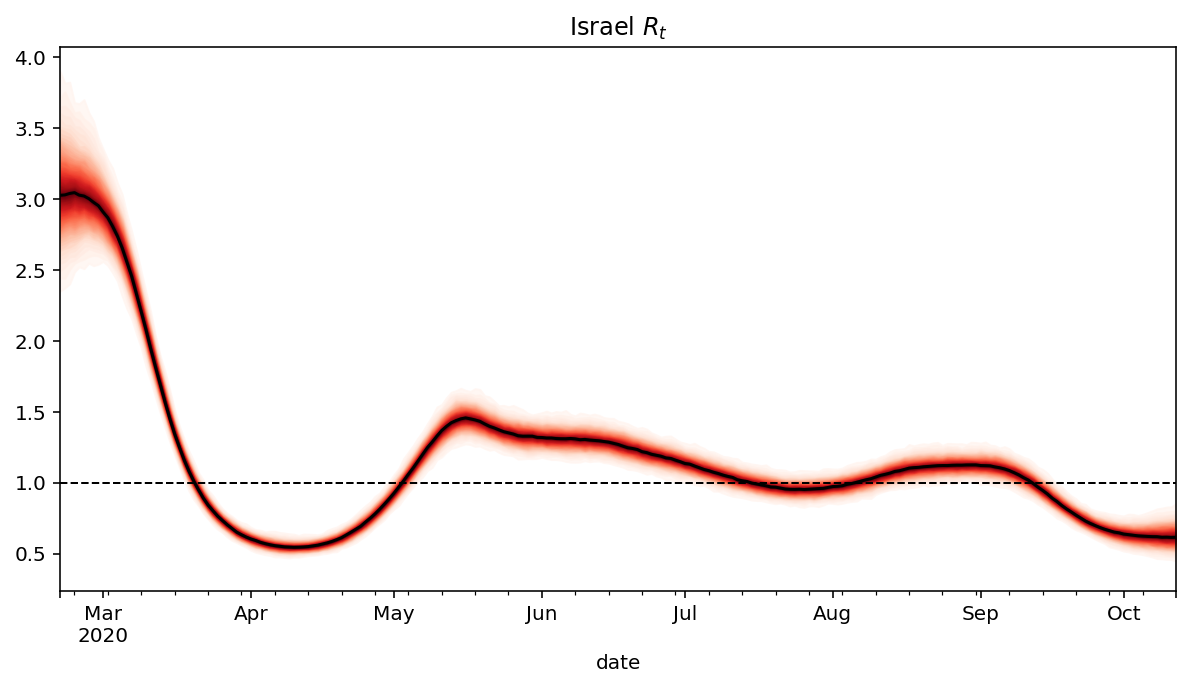

In [14]:
#plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$")
samples = gm.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_xlim(left = pd.Timestamp.today()-pd.Timedelta(days=70), right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_ylim(top = 2)
fig.set_facecolor('w')

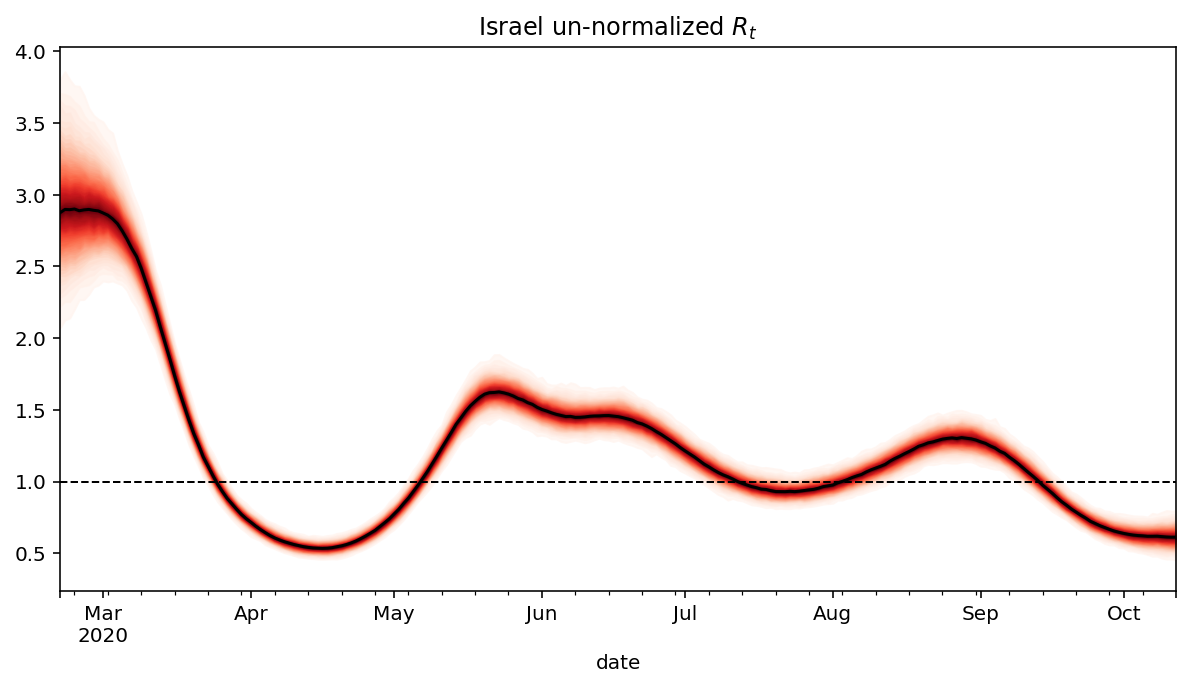

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} un-normalized $R_t$")
samples = gmunn.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

resultunn["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_xlim(left = pd.Timestamp.today()-pd.Timedelta(days=70), right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_ylim(top = 2)
fig.set_facecolor('w')

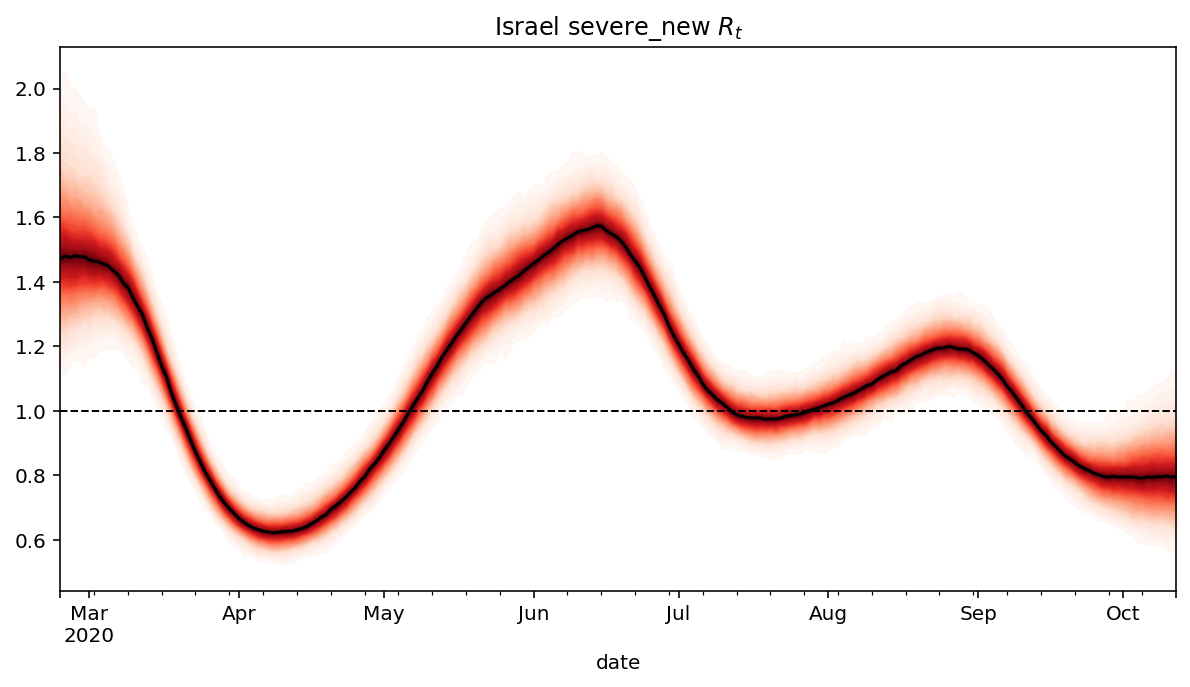

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} severe_new $R_t$")
samples = gmsev.trace['r_t']
x=resultsev.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

resultsev["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
fig.set_facecolor('w')